<a href="https://colab.research.google.com/github/GomathyDhanya/Foundations-of-Datascience/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UCS1625 - Foundations of Data Science**

**Assignment 2**

Gomathy Dhanya S
205001041
CSE-A

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#reading the data
data=pd.read_csv('/content/drive/MyDrive/fdsass/CreditCard.csv')

In [ ]:
data[:5]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#setting CUST_ID as index since it is not a feature to involve in the clustering 
#but just an identifier for each customer

X=data
X.set_index('CUST_ID', inplace=True)

In [ ]:
#Standardizing the data through Z-score normalization

X.fillna(0, inplace=True)
X = (X - np.mean(X,axis=0)) / np.std(X,axis=0)

In [ ]:
X[:5]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960213,-0.528979,-0.297310,-0.525551,0.36068
C10002,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688718,0.818642,0.102042,0.234227,0.36068
C10003,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826129,-0.383805,-0.088489,-0.525551,0.36068
C10004,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826129,-0.598688,-0.357035,-0.525551,0.36068
C10005,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905249,-0.364368,-0.252238,-0.525551,0.36068


In [ ]:
#Initializing Kmeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)

In [ ]:
#applying kmeans to the data
kmeans.fit(X)

KMeans(n_clusters=2, n_init=20, random_state=42)

The following are scatter plots taking 2 columns from the data.
Since the clustering was performed in multidimentional data, the scatter plots may not be as informative since it is just 2 dimentional.

The normalised data has been plotted along with the centroids

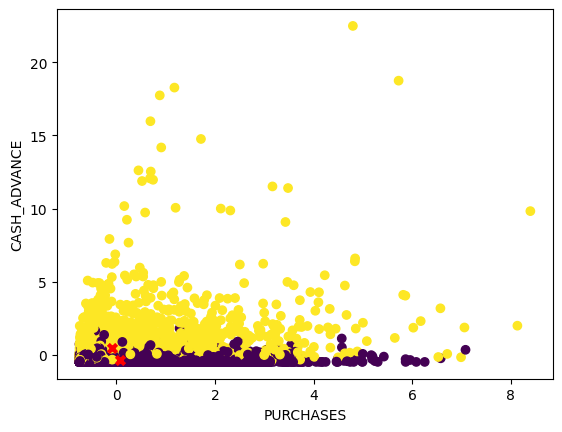

In [ ]:
plt.scatter(X["BALANCE"], X["PURCHASES"], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], marker='x', linewidths=3, color='r')
plt.xlabel("PURCHASES")
plt.ylabel("CASH_ADVANCE")
plt.show()

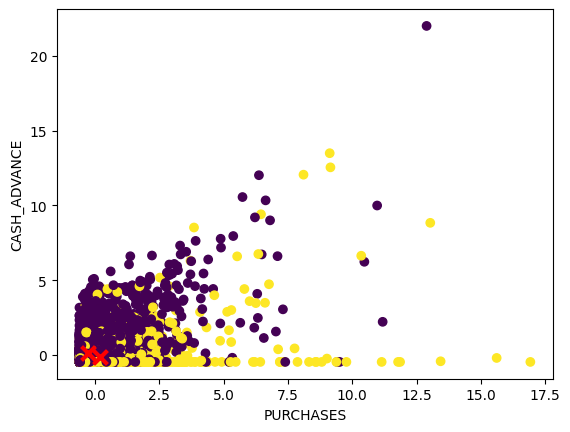

In [ ]:
plt.scatter(X["PAYMENTS"], X["CASH_ADVANCE"], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 5], kmeans.cluster_centers_[:, 13], marker='x', s=100, linewidths=3, color='r')
plt.xlabel("PURCHASES")
plt.ylabel("CASH_ADVANCE")
plt.show()